# 1) Hashing Task!

In [1]:
import pandas as pd
import time
import string
import time

Loading the password files

In [2]:
pass1 = open("passwords1.txt").read().splitlines()
pass2 = open("passwords2.txt").read().splitlines()

Defining the 2 hash functions to be used:

Method: For each existing string character i assign a value going from 0 to n (number of characters). Then i perform some transformations to make the hashes random. I finally mod with a prime number to minimise collisions.


In [3]:
def myhash1(s):
   
    a = string.printable
    lst = []
    for i in a:
        lst.append(i)  
        
    encoder = []
    for j in range(len(lst)):
        encoder.append(int((((j+100)**2)*5059)+47))
            

    keys= lst
    values= encoder
    dictionary = dict(zip(keys, values))
   
    empty= []
    for e in s:
        empty.append(dictionary.get(e))
    str1 =  int(''.join(map(str, empty)))
    return str1%861259057

def myhash2(s):
    
    a = string.printable
    lst = []
    for i in a:
        lst.append(i)  
        
    encoder = []
    for j in range(len(lst)):
        encoder.append(int(10 + ((j+100)**(3/2))*67))
            

    keys= lst
    values= encoder
    dictionary = dict(zip(keys, values))
   
    empty= []
    for e in s:
        empty.append(dictionary.get(e))
    str1 =  int(''.join(map(str, empty)))
    return str1%853969703

## Hashing passwords

Running time note: I believe the hashing of the passwords should not be included in the bloom filter function since most passwords are stored in their hash equivalent and also hashing the whole database 1 time over actually takes a very long time.
The running time of my hash functions is between 0.0006 and 0.0008 per string. Total strings to hash are more than 100 million, with 2 hashes this takes about 6 to 8 hours. Hence the actual bloom filter will be used on the list of already hashed passwords. Since the hash function was changed the new hashlists are based on a cut dataset to speed up running time without losing the logic of the filter. A prediction on running time for the whole dataset will be made at the end.

In [4]:
pass1 = pass1[:1000000]
pass2 = pass2[:390000]

Hashing existing passwords: passwords1

In [5]:
hash1p1 = [myhash1(str(pass1[i])) for i in range(len(pass1))]
hash2p1 = [myhash2(str(pass1[i])) for i in range(len(pass1))]

Hashing all the possible new passwords: passwords2

In [6]:
hash1p2 = [myhash1(str(pass2[i])) for i in range(len(pass2))]
hash2p2 = [myhash2(str(pass2[i])) for i in range(len(pass2))]

The hashes look like this:

In [9]:
print(hash1p1[:10])

[368678279, 188403858, 707803710, 105061637, 269377512, 423937066, 6527838, 673589225, 12503355, 278690290]


## Bloom Filter

Creating the bloom filter which is initially a containter list of all 0s. Length based on range of all possible hashes, determined by largest prime used in modding the hashes string.

In [10]:
def BloomFilter():
    start = time.time()
    bf0 = [0]*861259057

#Joining the lists(set union) of the 2 hash functions applied to the existing passwords(passwords1)
    hashlist = [hash1p1,hash2p1]
    listunion =  list(set().union(*hashlist))
    L = len(listunion)


#Filling in the bloom filter with 1 for every index that was created from hash functions
    for i in range(L):
        bf0[listunion[i]] = 1

#Now we have to see if the possible new passwords already exist according to out bloom filter.
    
    newhashlist = [hash1p2,hash2p2]

#Now I creat a yesno list saying if the potential new passwords exist or not, if both has indexes in the bloom filter equal 1, then exists, else they don't.

    yesno= []
    for i in range(len(hash1p2)):
        if bf0[newhashlist[0][i]] == 1 and bf0[newhashlist[1][i] == 1]:
            yesno.append(1)
        else:
            yesno.append(0)
    end = time.time()
    
#To calculate the probability of false positives i reference this source: https://tsapps.nist.gov/publication/get_pdf.cfm?pub_id=903775
  #and use Bloom's classical formulae for the false positive rate.

    m = 861259057#Length of bloom filter
    k = 2 #Number of hash functions used
    n = 1000000 #objects mapped in bloom filter(passwords1)
    p = (1-((1-1/m)**(k*n)))**k
  
    print('Number of hash function used: ', 2)
    print('Number of duplicates detected: ', sum(yesno))
    print('Probability of false positives: ', p)
    print('Execution time: ', end-start)


Bloom Filter steps:

1 - Initialising filter
2 - Joining the lists(set union) of the 2 hash functions applied to the existing passwords(passwords1)
3 - Filling the bloom filter with each index found by both hash functions
4 - Creating another list containing the prediction of our bloom filter
5 - Filling this list with 1s if both hashes of possible new passwords exist in bloom filter, 0 otherwise. 1 in "yesno" list means password from password2 database probably exists in password1 database already, 0 means password for sure does not exist.


Probability of false positives (FPR)
To calculate the probability of false positives i reference this source: https://tsapps.nist.gov/publication/get_pdf.cfm?pub_id=903775
I use Bloom's classical formulae for FPR. This underestimates the actual FPR of my bloom filter as proved in the paper but more accurate formulaes provided in the paper are computationally inefficient if not impossible with large datasets.

## BloomFilter Output/Final Comments

In [12]:
BloomFilter()

Number of hash function used:  2
Number of duplicates detected:  0
Probability of false positives:  5.380022741846551e-06
Execution time:  6.916478872299194


No duplicates were detected which is actually to be expected given the password datasets are made up of randomized 20 character strings.
Execution time on whole dataset which is 100 times larger is expected to be about 100 times larger since BloomFilter() is O(n). Therefore execution time would be around 400-700 seconds (guess of the average execition times)/ between 6 and 12 minutes on this particular machine. This particular bloom filter has a really low theoretical probability of false positives. Therefore the size of the filter could be reduced to lower execution time because the probability of false positives would still be low.

## Bonus

The exact number of false positives I have found is 0 since i detected 0 duplicates. If I did detect a duplicate I would find the index of the duplicate detected from hashing, find its corresponding string representation (the actual password from passwords2.txt file) and then I would run a search through the first database "passwords1.txt" and see if there is actually a match. If there is not then I would count that as a false positive.

# 2) Alphabetical Sort - Version 1

## Initialization part

In [146]:
import string

upper_letters = list(string.ascii_uppercase)
lower_letters = list(string.ascii_lowercase)

letters = []

for i in range(len(upper_letters)):
    letters.append(upper_letters[i])
    letters.append(lower_letters[i])

letters.insert(0," ")

alphabet_dic = dict(zip(letters, list(range(len(letters)))))

## Question 1

In [ ]:
def counting_sort(lst):
    max_value = max(lst)#we get the max_value of the list
    n = max_value + 1 #to add 0
    count = [0] * n  #for each number, we initialize occurrences at 0
    
    for num in lst: #everytime we encounter a specific number...
        count[num] += 1 #...we increase its count by 1
        
    i = 0
    for num in range(n):#for each number...
        for c in range(count[num]): #we append it c times to the list, with c being equal to its count in the original list  
            lst[i] = num
            i += 1

    return lst

In [141]:
counting_sort([23,67,1,189,3,3598,3,1,3,0,26,2])

[0, 1, 1, 2, 3, 3, 3, 23, 26, 67, 189, 3598]

## Question 2

In [47]:
#we create a specific function in order to get the max value in a letters list. 
#we can't use max() because our order is not like Python's order
def get_max_letter(lst): 
    letter = lst[0]
    for i in range(len(lst)):
        if alphabet_dic[lst[i]] > alphabet_dic[letter]:
            letter = lst[i]
    return letter

def letters_sort(lst):    
    max_value = get_max_letter(lst)#we get the max_value of the list
    ind = letters.index(max_value)#we get the index of this max letter
    letters_list = []
    for i in range(ind+1):
        letters_list.append(letters[i]) #and we store all letters with a smaller or equal index
    
    count = [0] * len(letters_list) #for each letter, we initialize occurrences at 0
        
    for letter in lst:#everytime we encounter a specific letter...
        ind = letters_list.index(letter)
        count[ind] += 1 #...we increase its count by 1

    i = 0
    for ind in range(len(count)):#for each letter...
        for c in range(count[ind]): #we append it c times to the list, with c being equal to its count in the original list  
            lst[i] = letters_list[ind]
            i += 1

    return lst

In [48]:
letters_sort(['a','c','M','k','C','a','A','f','M','F','M'])

['A', 'a', 'a', 'C', 'c', 'F', 'f', 'k', 'M', 'M', 'M']

## Question 3

In [144]:
def words_sort(words_list):
    letter_ind_list = []
    for word in words_list: 
        letter_ind = []
        for letter in word:#for each letter of each word, we store the index (in our sorted letters_lists) of this letter 
            letter_ind.append(alphabet_dic[letter])
        letter_ind_list.append(letter_ind) 
        
    ordered_ind_letters_list = []#we alphabetically sort our words by comparing their letters' indexes
    while len(letter_ind_list) > 0:
        ind_min = letter_ind_list.index(min(letter_ind_list))
        val = letter_ind_list.pop(ind_min)
        ordered_ind_letters_list.append(val)
        
    ordered_words_list = []#and then we recompose our words by getting the letters matching their indexes
    for elem in ordered_ind_letters_list:
        word = ''
        for letter_ind in elem:
            word += list(alphabet_dic.keys())[letter_ind]

        ordered_words_list.append(word)
        
    return ordered_words_list

In [145]:
words_sort(['Hello','hello','hmar','Zouave','Data','hello','helloo','dictionary','jacket'])

['Data',
 'dictionary',
 'Hello',
 'hello',
 'hello',
 'helloo',
 'hmar',
 'jacket',
 'Zouave']

# 2bis) Alphabetical Sort - Version 2

In [ ]:
# Timeit functions
import time
#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))

## Part 1. (Counting Sort)

In Counting sort, the frequencies of distinct elements of the array to be sorted is counted and stored in an auxiliary array, by mapping its value as an index of the auxiliary array.

In [ ]:
# My implementation 
import itertools

l = list(map(int, input().split()))
start_time = time.time()

max_l = max(l)
sub_l = [0] * (max_l+1)
sort = []
temp = []

for i in l:
    sub_l[i] +=1

for i, element in enumerate(sub_l):
    temp = [i]*element
    sort.append(temp)

sort_flat = list(itertools.chain.from_iterable(sort))
print(sort_flat)
print("--- %s seconds ---" % (time.time() - start_time))

## Part 2. (Alphabet)

#### Build an algorithm, based on your implementation of Counting Sort, that receives in input a list with all the letters of the alphabet (not in alphabetical order), and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).

In [ ]:
# My implementation ++ ----> complexity = O(n)

# For now it works, fix the double for loop
import itertools
import string
from collections import Counter

l = list(input().split())
start_time = time.time()
# Dictionary of the alphabet
alpha_dict = dict(enumerate(string.ascii_lowercase))
alpha_dict = {v: k for k, v in alpha_dict.items()}
# Compare each value of our input with the alphabet dictionary and append the key if it's present
new_l = []
for i in l:
    if i in alpha_dict.keys():
        new_l.append(alpha_dict[i])
# Once we have new_l = list of keys, we can use the same algorithm of before
max_l = max(new_l)
sub_l = [0] * (max_l+1)
sort = []
temp = []

for i in new_l:
    sub_l[i] +=1

for i, element in enumerate(sub_l):
    temp = [i]*element
    sort.append(temp)

sort_flat = list(itertools.chain.from_iterable(sort))
alpha_dict = {v: k for k, v in alpha_dict.items()}
# We invert the initial process, we check if the list of keys is in the dictionary and if it's true append the value
final_l = []
for j in sort_flat:
    if j in alpha_dict.keys():
            final_l.append(alpha_dict[j])

print(*final_l) # it works
print("--- %s seconds ---" % (time.time() - start_time))

## Part 3. (Words)

#### Build an algorithm, based on your implementation of Counting Sort, that receives in input a list of length m, that contains words with maximum length equal to n, and returns the list ordered according to alphabetical order. Discuss time complexity (theoretically and empirically).

In [110]:
import itertools
import string
from collections import Counter

# Input initial words
word = input().split()

# Create a dictionary of id's and letters
alpha_dict = dict(enumerate(string.ascii_lowercase))
# invert id's and letters of the dictionary
alpha_dict = {v: k for k, v in alpha_dict.items()}

# Compare each value of our input with the alphabet dictionary and append the key if it's present
# Create a dictinary with values of each letter of the words
c = 0
new_dict = {}
for i in words:
    new_l = []
    for letter in i:
        if letter in alpha_dict.keys():
            new_l.append(alpha_dict[letter]) # create a new list with m values (one for each letter of the word)
        new_dict[c] = new_l # we created a dictionary containing all these new values
    c += 1

order = []

luca ciao stai come


In [111]:
for key, value in new_dict.copy().items():
    key, value = min(new_dict.items(), key=lambda x: x[1]) # look for the smallest value of the dictionary, that means it's the first word alphabetically speaking
    order.append(value)
    print(key, value)
    del new_dict[key]    
        

3 [2, 8, 0, 14]
1 [2, 14, 12, 4]
0 [11, 20, 2, 0]
2 [18, 19, 0, 8]


In [112]:
order

[[2, 8, 0, 14], [2, 14, 12, 4], [11, 20, 2, 0], [18, 19, 0, 8]]

In [113]:
alpha_dict = {v: k for k, v in alpha_dict.items()}

final_word = []           
for i in order:
    word = ''
    for number in i:
        if number in alpha_dict.keys():
            word += alpha_dict[number]
    final_word.append(word) # create a new list with m values (one for each letter of the word)
final_word

['ciao', 'come', 'luca', 'stai']

# 3) Find similar wines!

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### FUNCTIONS:

In [2]:
def kmeans (k, dataframe):
    np.random.seed(2) # set a random seed so that we can reproduce the results
    k_means = (dataframe.sample(k, replace=False))    # store current means
    k_means.index = pd.RangeIndex(len(k_means.index)) # re-assign index
    k_means2 = pd.DataFrame()                    # store previous means
    distance = pd.DataFrame()                    # store distances
    n_iter = 100 
    n = 0

    while n < n_iter:
        if (k_means2.equals(k_means) == False):

            # distance matrix (euclidean distance)
            cluster_count = 0
            for idx, k_mean in k_means.iterrows():

                distance[cluster_count] = (dataframe[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
                cluster_count += 1

            # update cluster
            dataframe['Cluster'] = distance.idxmin(axis=1) # get's the minimum value of the cluster

            # store previous cluster
            k_means2 = k_means
            k_means = pd.DataFrame()
            k_means_frame = dataframe.groupby('Cluster').agg(np.mean)

            k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

            n += 1

        else:
            break 
        
    return dataframe, n

In [3]:
def elbow_method(k, dataframe):
    np.random.seed(2) # set a random seed so that we can reproduce the results
    k_means = (dataframe.sample(k, replace=False))    # store current means
    k_means.index = pd.RangeIndex(len(k_means.index)) # re-assign index
    k_means2 = pd.DataFrame()                    # store previous means
    distance = pd.DataFrame()                    # store distances
    n_iter = 100 
    n = 0
    while n < n_iter :
        if (k_means2.equals(k_means) == False):

            # distance matrix (euclidean distance)
            cluster_count = 0
            for idx, k_mean in k_means.iterrows():

                distance[cluster_count] = (dataframe[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5) # euclidean distance
                cluster_count += 1

            # update cluster
            dataframe['Cluster'] = distance.idxmin(axis=1) # get's the minimum value of the cluster

            # store previous cluster
            k_means2 = k_means
            k_means = pd.DataFrame()
            k_means_frame = dataframe.groupby('Cluster').agg(np.mean)

            k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
            n += 1
            wcss = distance.values.min(axis=1).sum()
        else:
            break

    return wcss

In [58]:
def kmeans_pick (k, dataframe):
    np.random.seed(2) # set a random seed so that we can reproduce the results
    

    # let's create a copy of the the centroids
    k_means = df.mean(axis = 0).to_frame().T
    kmeans1 = k_means.copy()
    kmeans1 = kmeans1 + 0.05
    k_means = pd.concat([k_means, kmeans1], axis = 0)    
    k_means = pd.concat([k_means, kmeans1+0.05], axis = 0)  # we do it twice because we need 3 centroids
    
    
   # k_means = (dataframe.sample(1, replace=False))    # store current means
   # k_means.index = pd.RangeIndex(len(k_means.index)) # re-assign index
    # let's create a copy of the the centroids

    
    k_means2 = pd.DataFrame()                    # store previous means
    distance = pd.DataFrame()                    # store distances
    n_iter = 100 
    n = 0

    while n < n_iter:
        if (k_means2.equals(k_means) == False):

            # distance matrix (euclidean distance)
            cluster_count = 0
            for idx, k_mean in k_means.iterrows():

                distance[cluster_count] = (dataframe[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
                cluster_count += 1

            # update cluster
            dataframe['Cluster'] = distance.idxmin(axis=1) # get's the minimum value of the cluster

            # store previous cluster
            k_means2 = k_means
            k_means = pd.DataFrame()
            k_means_frame = dataframe.groupby('Cluster').agg(np.mean)

            k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

            n += 1

        else:
            break 
        
    dataframe.columns = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline', 'Cluster']

    return dataframe, n, k_means

## Part 1. The Algorithm

In [5]:
# Open a new file to save trace runs
col_names = ['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine = pd.read_csv('wine.data', header = None)
wine.columns = col_names


# Normalize the array because large values would overwhem small values
wine_array = wine.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(wine_array)
df = pd.DataFrame(x_scaled)
wine = pd.DataFrame(x_scaled)
del df[0] # delete the first column ( Class )

k = 3 # for now we pick 3 clusters/centroids, later we'll check with the elbow method if this is the best solution

In [4]:
# for the sake of it we can check if the DataFrame contains any Nan values, then we can procede
wine.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [4]:
df1 = df.copy()
result, it = kmeans (k, df1)

In [6]:
result.columns = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline', 'Cluster']
result.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949,0
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,0
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392,0
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,0
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076,0


## Part 2. How many clusters should we pick?

## Elbow Method

What's the optimal number of cluster? We should use the elbow method.
For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.<br/><br/>
As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

In [13]:
# We'll create a dataframe that contains the aggregate distance AND number of clusters as two distinct features
elbow = pd.DataFrame(0, index=np.arange(1,11), columns = ['Number of clusters', 'Sum. square distances']) # empty df with 2 columns
K = range (1,11) # we are testing from k = 1 to k = 10
df_elbow = result.copy() # we copy the result dataframe that we got in the first section
for i in K:
    elbow['Number of clusters'][i] = i
    test = elbow_method(i, df_elbow)
    elbow['Sum. square distances'][i]= test

In [14]:
elbow

,Number of clusters,Sum. square distances
1,1,127
2,2,103
3,3,88
4,4,86
5,5,83
6,6,82
7,7,81
8,8,79
9,9,77
10,10,76


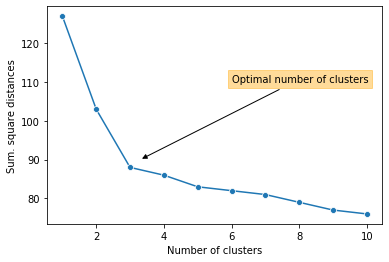

In [15]:
sns.lineplot(x="Number of clusters", y="Sum. square distances", data=elbow, marker="o")

plt.annotate("Optimal number of clusters", xy=(3.3, 90), xytext=(6, 110),
             arrowprops={'arrowstyle':'-|>', 'color': 'black' 
                         },
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4});

As we can see the number of **optimal** clusters that we should use is **3**.

## Statistical Description

Now we are just comparing the initial dataframe _**wine**_ (that has a feature 'Class' with default classes) and the one we created with the k-means algorithm <br/> ( _**result**_ ) by analyzing the statistical summary.

In [17]:
df_group = result.groupby(['Cluster']).agg([np.sum, np.average, np.size, np.argmax]).reset_index()
df_group

Cluster    Alcohol                        Malic acid                         \
                 sum   average  size argmax        sum   average  size argmax   
0       0  42.463158  0.707719  60.0    8.0  14.513834  0.241897  60.0   45.0   
1       1  19.886842  0.315664  63.0   71.0  15.328063  0.243303  63.0  123.0   
2       2  29.957895  0.544689  55.0  158.0  26.314229  0.478441  55.0  173.0   

         Ash  ...   Hue        OD280/OD315 of diluted wines                  \
         sum  ...  size argmax                          sum   average  size   
0  35.181818  ...  60.0   73.0                    41.479853  0.691331  60.0   
1  29.818182  ...  63.0  115.0                    37.150183  0.589685  63.0   
2  30.807487  ...  55.0   60.0                     8.849817  0.160906  55.0   

            Proline                         
  argmax        sum   average  size argmax  
0   22.0  35.940799  0.599013  60.0   18.0  
1  121.0   9.983595  0.158470  63.0   74.0  
2  141.0  13.606990  0.247400  55.0  157.0  

[3 rows x 53 columns]

In [18]:
wine.columns =  ['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine_group = wine.groupby(['Class']).agg([np.sum, np.average, np.size, np.argmax]).reset_index()
wine_group

Class    Alcohol                        Malic acid                         \
               sum   average  size argmax        sum   average  size argmax   
0   0.0  42.150000  0.714407  59.0    8.0  14.816206  0.251122  59.0   45.0   
1   0.5  23.331579  0.328614  71.0   71.0  16.735178  0.235707  71.0  123.0   
2   1.0  26.826316  0.558882  48.0  158.0  24.604743  0.512599  48.0  173.0   

         Ash  ...   Hue        OD280/OD315 of diluted wines                  \
         sum  ...  size argmax                          sum   average  size   
0  34.566845  ...  59.0   15.0                    40.798535  0.691501  59.0   
1  33.593583  ...  71.0  115.0                    39.410256  0.555074  71.0   
2  27.647059  ...  48.0  161.0                     7.271062  0.151480  48.0   

            Proline                         
  argmax        sum   average  size argmax  
0   22.0  35.253210  0.597512  59.0   18.0  
1  121.0  12.230385  0.172259  71.0   73.0  
2  141.0  12.047789  0.250996  48.0  157.0  

[3 rows x 53 columns]

As we can see the statistical summary is almost the same, this means that the initial division by classes of different wines is very similar to the clusters that we found. This remarks the fact that the number of clusters we picked with the elbow method is optimal and close to the truth.

## PCA

PCA is used to reduce dimensions, we start with a 13 dimension dataframe and we reduce it to 2. By doing this we are able to plot it and check the relationship of the data.

In [19]:
from sklearn.decomposition import PCA

In [20]:
clean_df = result.copy()
del clean_df['Cluster'] # we delete the column cointaining the clusters and we only keep the 13 features

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(clean_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [22]:
# concatenate PCA dataframe with our result dataframe so that we have the cluster column as well
finalDf = pd.concat([principalDf, result['Cluster']], axis = 1)

In [23]:
finalDf.head(5)

,PC1,PC2,Cluster
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,0


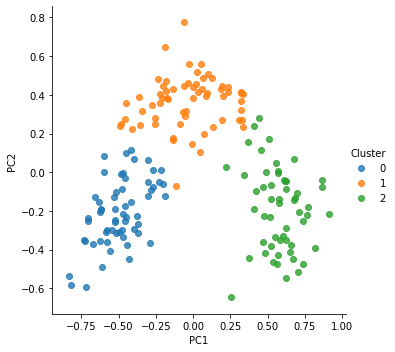

In [24]:
sns.lmplot(data=finalDf, x='PC1', y='PC2', fit_reg = False, hue='Cluster', legend=True, legend_out=True)

With the PCA's plot we are able to say that having three different clusters isn't totally inaccurate.

## Part 3. Which feature impacts the most?

### Pairplot

Thanks to pairplot we can visualize the **joint** (scatterpots) distribution and the **marginal** (histograms) distribution. This could be confusing at first, we are going to analyze the most important plots right below.

C:\Users\Luca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Luca\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


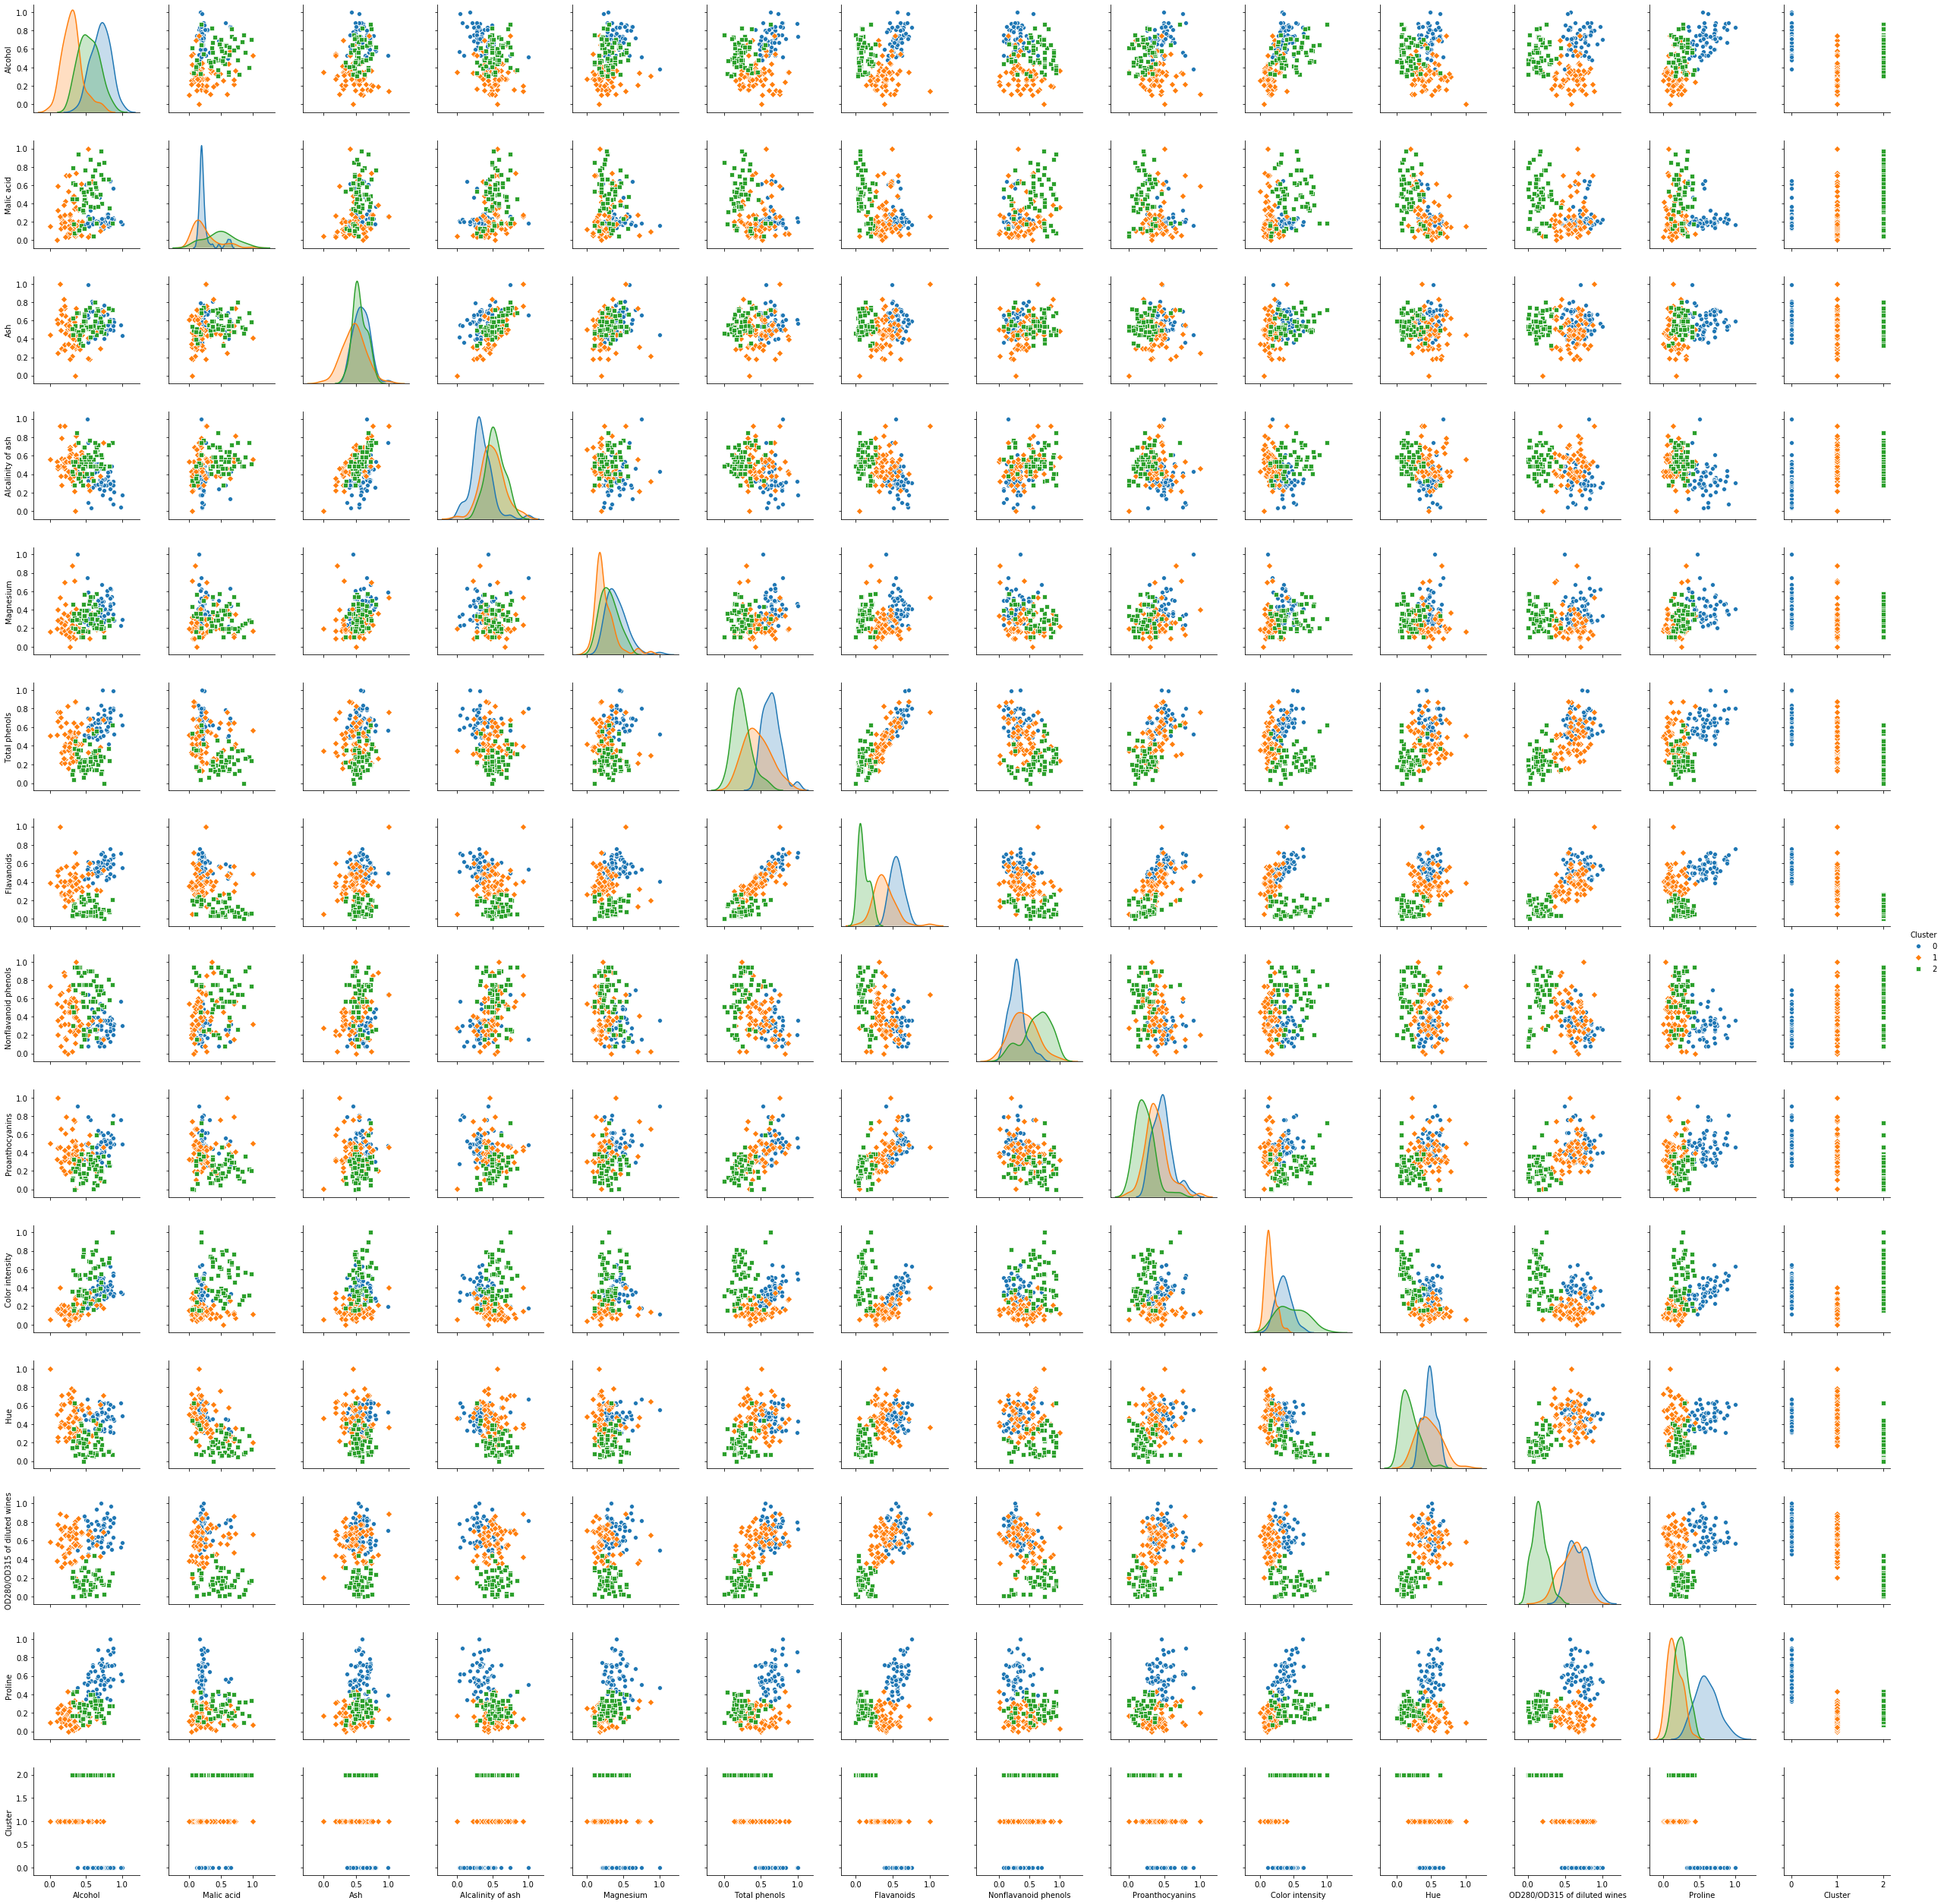

In [21]:
g = sns.pairplot(result, hue = 'Cluster', markers = ['o', 'D', 's'])

### Distributions

In [22]:
col = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

<Figure size 432x504 with 0 Axes>

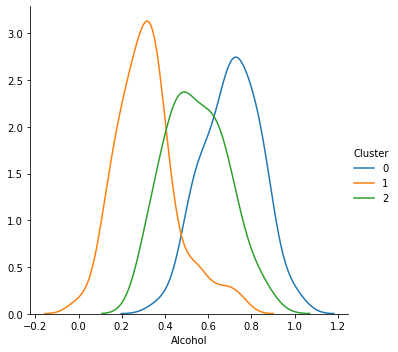

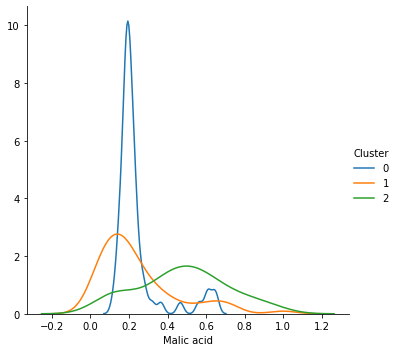

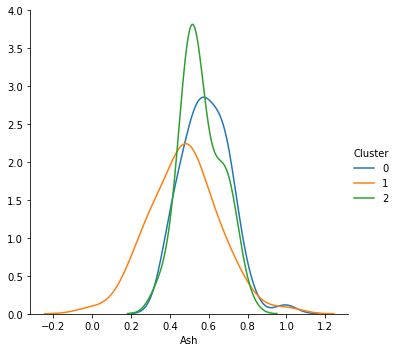

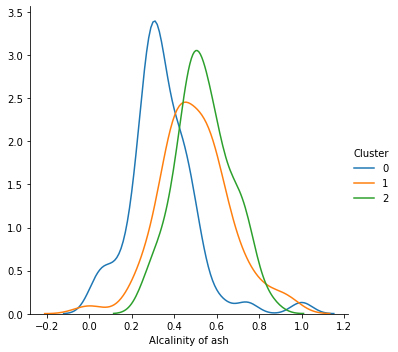

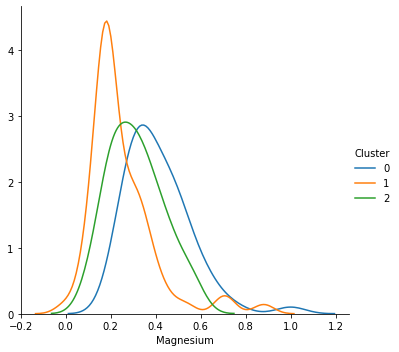

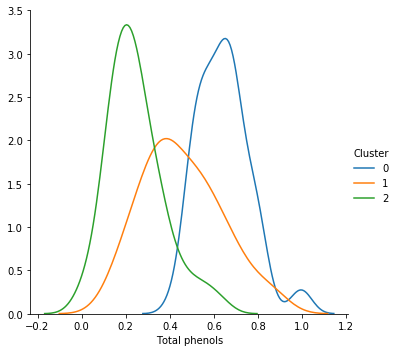

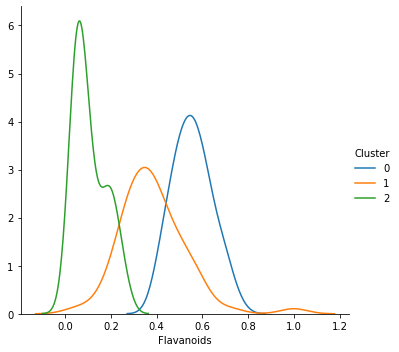

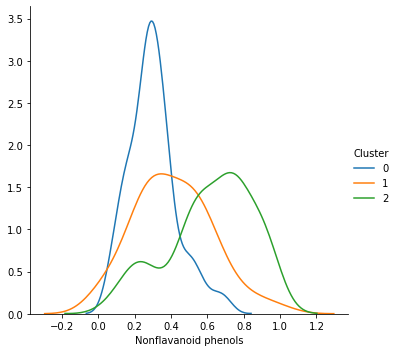

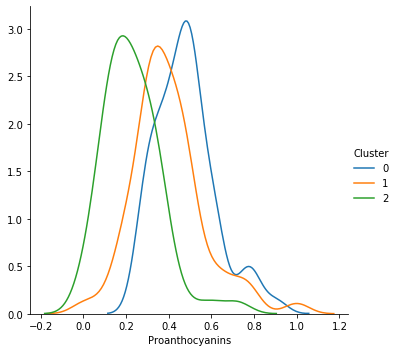

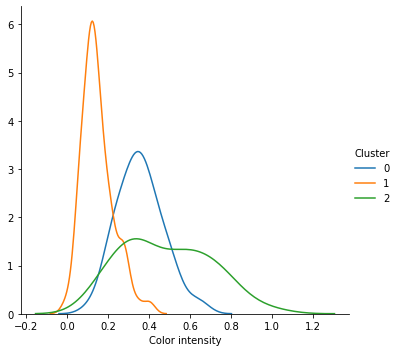

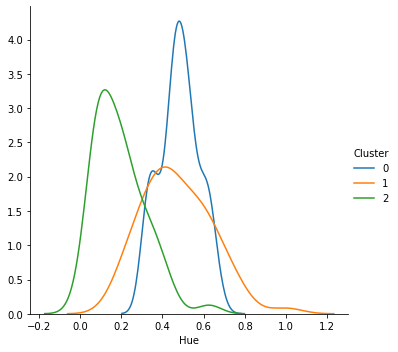

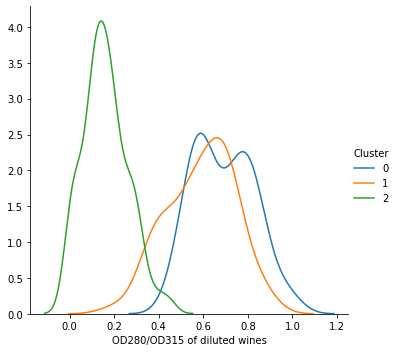

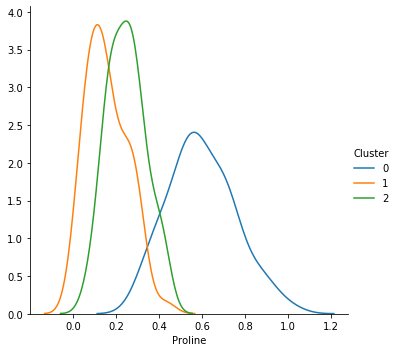

<Figure size 432x504 with 0 Axes>

In [24]:
# We plot every distribution, divinding them by Clusters
for i in col:
    sns.FacetGrid(result,hue="Cluster",height=5).map(sns.distplot,i,hist=False).add_legend()
plt.figure(figsize=(6,7))


#### Most relevant features:<br/>
* **Alcohol:** This feature's distribution is moderatly correlated to the different clusters, but it's not the most relevant one.<br/><br/>

* **Malic acid:** This feature instead gives us a good idea on why the distribution of the three clusters are diverse. Malic acid is one of the principal organic acids found in wine grapes, this means that analyzing three different variety of grapes will give us different concentration of acid. <br/><br/>

* **Total phenols:** This feature depends on a broad selection of reasons why it's different in each variety of grapes, such as the methods of production, wine type, grape varieties, ageing processes. It could depend on the meteorological conditions: the growth cycle of the grapevine, sunlight will increase the concentration of phenolics in the grape berries. <br/>
This feauture includes *__Flavanoids and Nonflavanoid phenols__*.<br/><br/>

* **Color intensity and color Hue:** Obviously as we initially said we are analyzing three differnt types of grapes that will eventually produce three different types of wine (as we've seen in the k-means algorithm, ending up with k = 3). The distribution for the color intensity highlights the dependence of variety of grapes and color intensity.<br/><br/>

* **OD280/OD315 of diluted wines and Proline:** The first is a type of protein and as we said up until now, different types of grapes, cultivated in different conditions, different ground, will contain different quantities of proteins.<br/>
As for the second one, it's an amino acid used in the biosynthesis of proteins. In wine-making, proteins rich in proline combine with polyphenols to produce haze (turbidity).



What we've said in this section can be seen (with a magnifying glass) in the initial **pairplot**. Each scatterplot that is based on the previous features that we listed is consistently showing that there are three different clusters. <br/><br/> We can focus on some of them more closely:

#### Proline and OD280/OD315

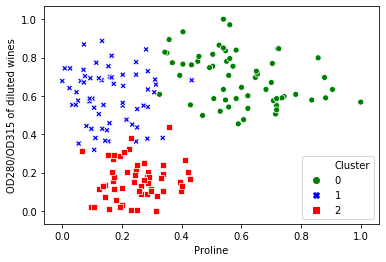

In [28]:
ax = sns.scatterplot(x="Proline", y="OD280/OD315 of diluted wines",
                   hue="Cluster", style="Cluster", data=result,  palette=['green','blue','red'])

#### Proline and Flavanoids

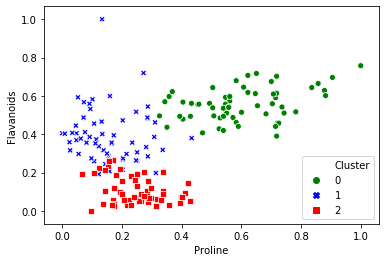

In [29]:
ax = sns.scatterplot(x="Proline", y="Flavanoids",
                   hue="Cluster", style="Cluster", data=result,  palette=['green','blue','red'])

#### Flavanoids and Color intensity

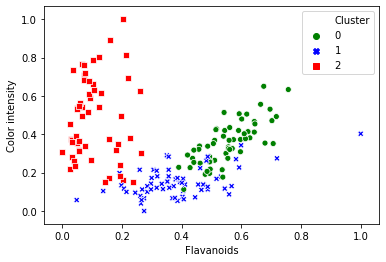

In [30]:
ax = sns.scatterplot(x="Flavanoids", y="Color intensity",
                   hue="Cluster", style="Cluster", data=result,  palette=['green','blue','red'])

#### Flavanoids and Malic acid

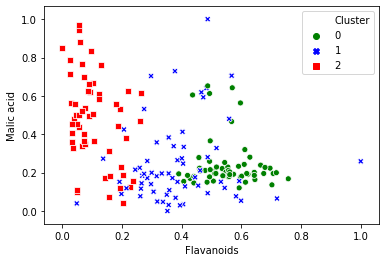

In [31]:
# In this case the distinction isn't so clear!

ax = sns.scatterplot(x="Flavanoids", y="Malic acid",
                   hue="Cluster", style="Cluster", data=result,  palette=['green','blue','red'])

## Bonus part. MapReduce

In [69]:
# we pick randomly our initial centroids randomly 

np.random.seed(2) # set a random seed so that we can reproduce the results
k_means = (df.sample(k, replace=False))    # store current means
k_means.index = pd.RangeIndex(len(k_means.index)) # re-assign index
k_means2 = pd.DataFrame()                    # store previous means
clusters = pd.DataFrame()                    # store distances
n_iter = 100 
n = 0

Since we have to perform two different processes we can divide them into two different functions:
* **Map** function: <br/>
In this function we perform the computation of squared distance and then we find the minimun, this is done on each datapoint with every centroid (these two will be the arguments). The function returns the updated dataframe with the labels of the clusters as an additional column. <br/><br/>

* **Reduce** function: <br/>
In this function instead we compute the new mean of the centroids and pick those values as the new ones.



In [66]:
# Map function
def mapper (k_means, dataframe):
    cluster_count = 0
    for idx, k_mean in k_means.iterrows():

        clusters[cluster_count] = (dataframe[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
        cluster_count += 1

    # update cluster
    dataframe['Cluster'] = clusters.idxmin(axis=1) # get's the minimum value of the cluster
    return dataframe

In [67]:
# Reduce Function
def reducer (k_means, k_means2, dataframe):

    if (k_means2.equals(k_means) == False):
        
        k_means2 = k_means
        # store previous cluster
        k_means = pd.DataFrame()
        k_means_frame = dataframe.groupby('Cluster').agg(np.mean)

        k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
    
        return k_means, '', k_means2

    else:
        return k_means, 'break', k_means2

In [71]:
# Timeit function

start_time = time.time()
while n < n_iter:
        # map function
        df1 = mapper (k_means, df)

        # reduce function      
        k_means, check, k_means2 = reducer (k_means, k_means2, df1)
        
        #dumbo.run(mapper, reducer, combiner=reducer)

        if check == 'break': # if centroids are equal to the previous ones we stop the process
            break
        else:
            n += 1
print("--- %s seconds ---" % (time.time() - start_time), "and we had {} iterations".format(n))

--- 0.05186152458190918 seconds --- and we had 5 iterations


It takes less time to compute, and since this process should be done on two different machines it will take much less. Unfortunately we had no time to implement this algorithm with Hadoop, Spark or multiprocessing methods, but we hope that the effort will be appreciated.

# 4) K-means can go wrong!

In [27]:
# Timeit function
import time

#### For this question we were asked to provide an example of why initialization in so important, we can provide a couple of them:
* Random initialization could give us the same centroids
* Concentric dataset
* Non normalized data

## 4.1 Random initialization

In [6]:
# we are still using the initial dataframe with the same k-means algorithm 
df.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### This is the initial case, where the random points are picked without replacement

In [64]:
start_time = time.time()
df4 = df.copy()
result1, iterations = kmeans (k, df4)
print("--- %s seconds ---" % (time.time() - start_time), "and we had {} iterations".format(iterations))

--- 0.2184157371520996 seconds --- and we had 5 iterations


In [16]:
result1.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,Cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


### Now let's try picking "randomly" the same centroids

In [59]:
start_time = time.time()
df5 = df.copy()
result2, iterations2, j= kmeans_pick (k, df5)
print("--- %s seconds ---" % (time.time() - start_time), "and we had {} iterations".format(iterations2))

--- 0.3830080032348633 seconds --- and we had 9 iterations


In this case we had almost double the iterations and double the processing time

In [61]:
result2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2


It might seem it's working, actually it takes less iteration than before. Let's check graphically if it's producing the same result as before.

<Figure size 432x504 with 0 Axes>

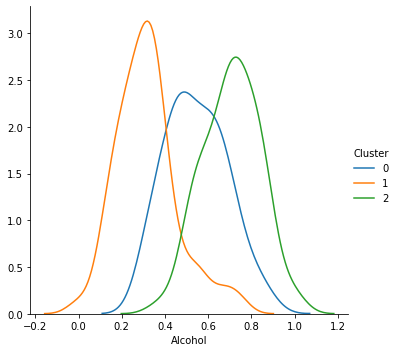

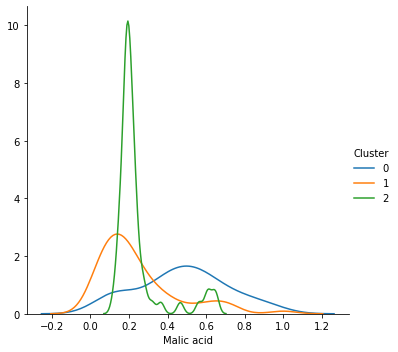

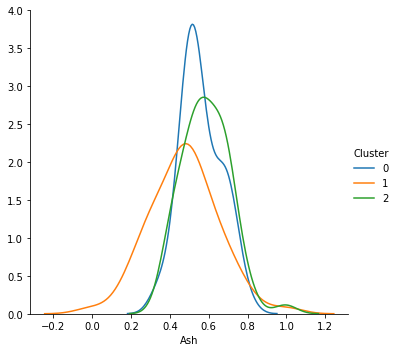

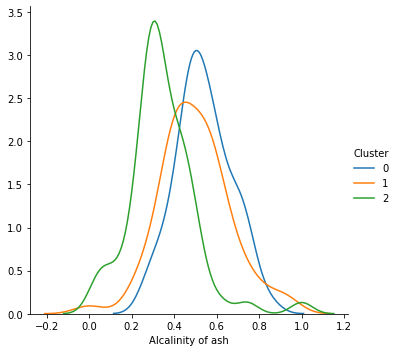

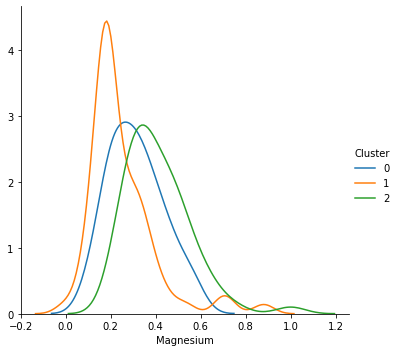

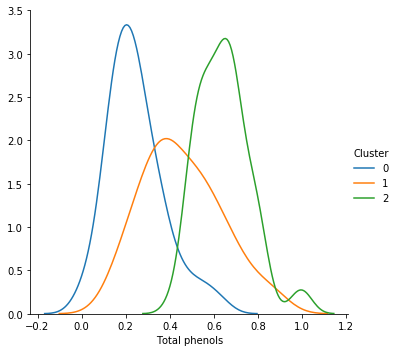

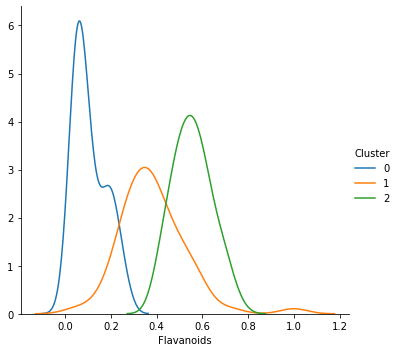

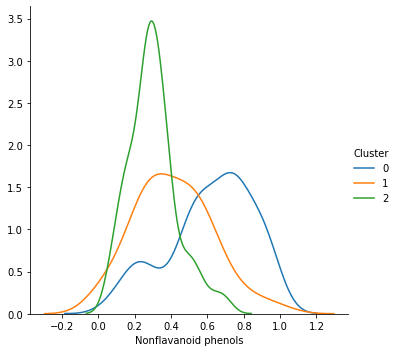

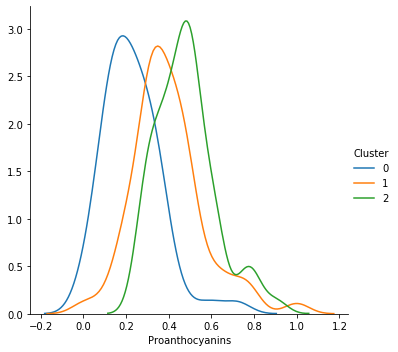

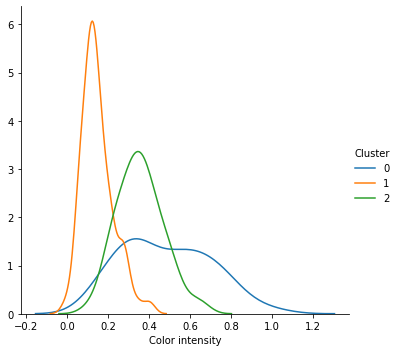

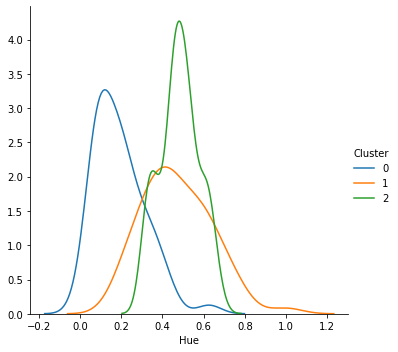

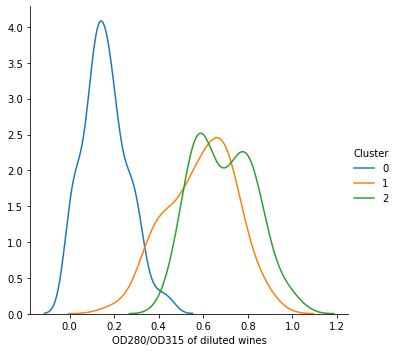

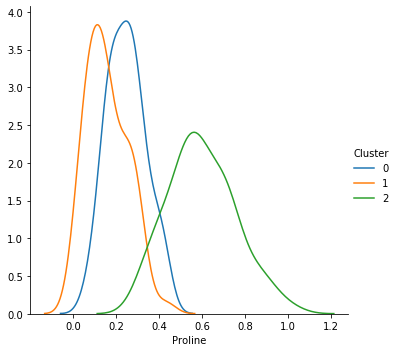

<Figure size 432x504 with 0 Axes>

In [62]:
# We plot every distribution, divinding them by Clusters
col = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
for i in col:
    sns.FacetGrid(result2,hue="Cluster",height=5).map(sns.distplot,i,hist=False).add_legend()
plt.figure(figsize=(6,7))

This proved that random initialization isn't the best approach, or better, it depends on the dataset we are dealing with. Since this problem has been taken into account, this kind of algorithm has been modified over the years. The most famous one is k-means++ that is in essence only a tweak of k-means. <br/>
You pick the initial centroids using an algorithm that tries to initialize centroids that are far apart from each other. This process is obviously more expensive than the ordinary one, there is in fact a trade-off between efficiency and speed (as always). <br/>
Another problematic case is initializing centroids that are far from the rest of the datapoints (ex. picking an outlier). In that case the distance is maximum and so is the cost.

## 4.2 Concentric Dataset

Another clustering problem could be using the wrong method for a certain dataset

In [12]:
from matplotlib import pyplot
from pandas import DataFrame
import sklearn.datasets

# In this case we are simulating a dataset that cointains datapoints that for a concentric form

# generate 2d classification dataset
X, y = sklearn.datasets.make_circles(n_samples=100, noise=0.05)

# create a DataFrame with these points
conc = DataFrame(dict(x=X[:,0], y=X[:,1]))

In [13]:
conc.head(5)

,x,y
0,-0.143635,-0.843347
1,-0.067732,-0.731225
2,0.461686,0.731244
3,-0.299952,0.825897
4,0.339022,-0.591697


This is what we initially get if we plot all the points of the DataFrame, how should it be clustered?

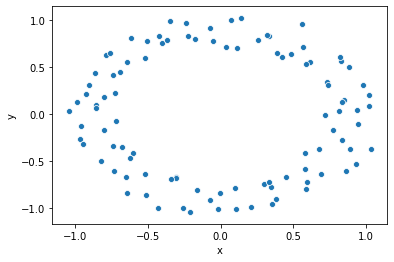

In [57]:
sns.scatterplot(x='x', y="y", data=conc)

#### K-means

In [62]:
conc_result, it_conc = kmeans(2, conc) # we use our initial function

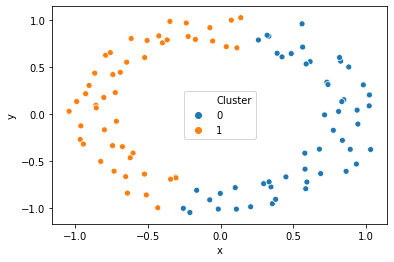

In [64]:
sns.scatterplot(x='x', y="y", hue = 'Cluster', data=conc_result) # this is the result

#### SImulationg the result of spectral clustering

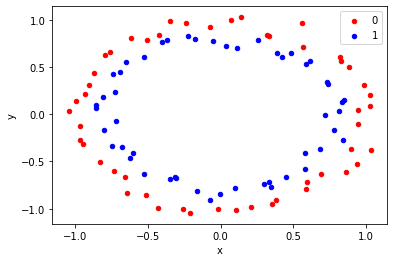

In [69]:
conc2 = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = conc2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

We can say that k-means is not a good clustering method for concentrical data

## 4.3 Scaling your dataset

As we will see rescaling your datasets will completely change results.

In [71]:
# Open a new file to save trace runs
col_names = ['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine = pd.read_csv('wine.data', header = None)
wine.columns = col_names

del wine['Class'] # delete the first column ( Class )
k = 3 # for now we pick 3 clusters/centroids, later we'll check with the elbow method if this is the best solution

In [74]:
non_scaled_result, nsr_it = kmeans(k, wine)

In [81]:
clean_df = non_scaled_result.copy()
del clean_df['Cluster'] # we delete the column cointaining the clusters and we only keep the 13 features

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(clean_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


# concatenate PCA dataframe with our result dataframe so that we have the cluster column as well
finalDf = pd.concat([principalDf, non_scaled_result['Cluster']], axis = 1)

In [82]:
finalDf.head(5)

,PC1,PC2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,1


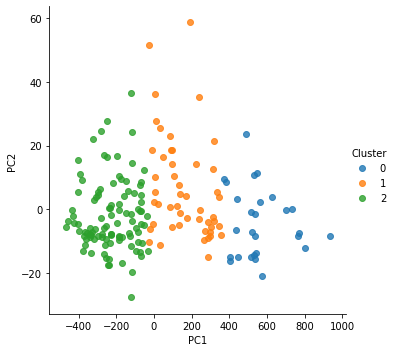

In [83]:
sns.lmplot(data=finalDf, x='PC1', y='PC2', fit_reg = False, hue='Cluster', legend=True, legend_out=True)

In this case we could actually use 2 clusters instead of one

<Figure size 432x504 with 0 Axes>

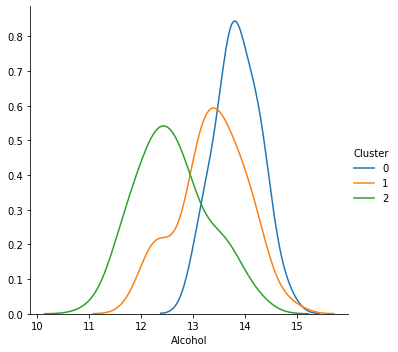

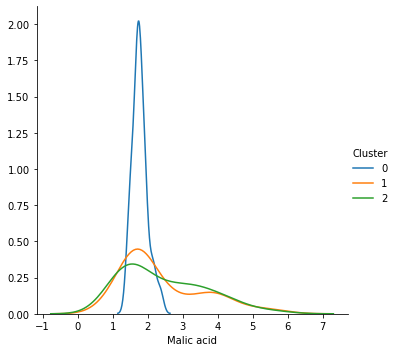

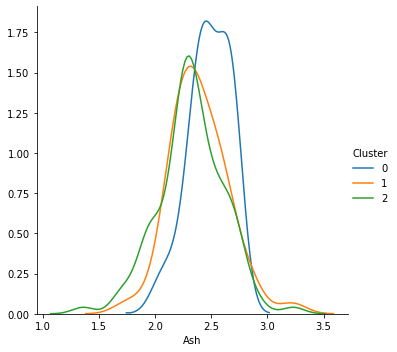

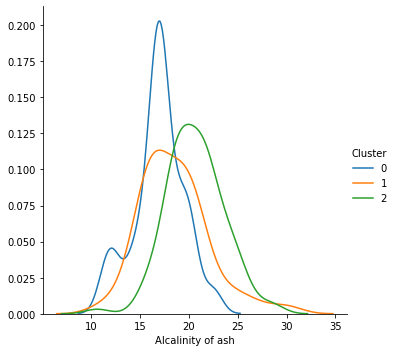

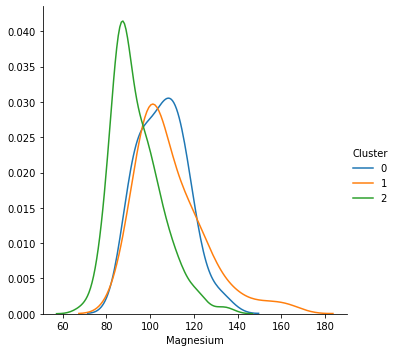

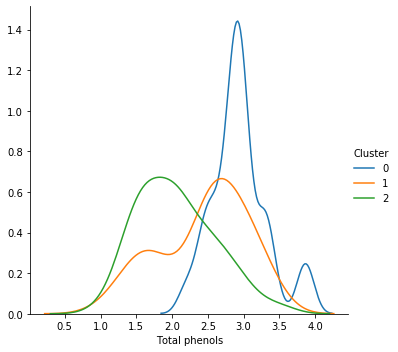

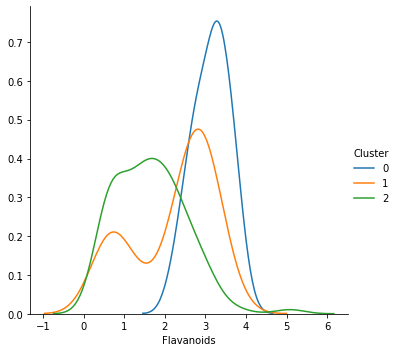

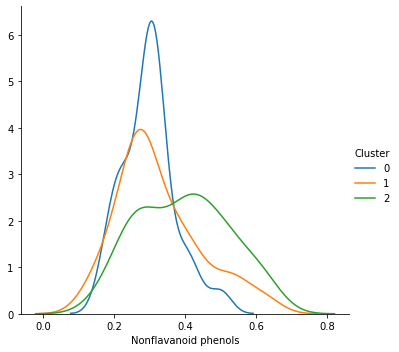

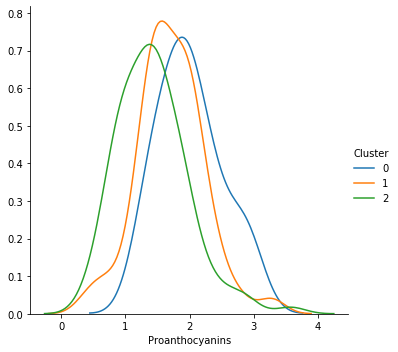

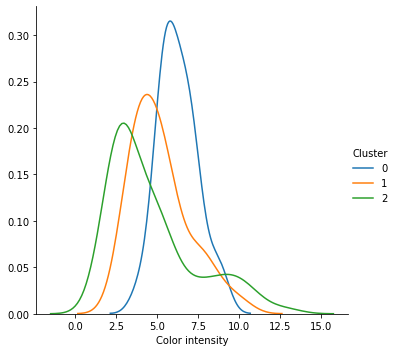

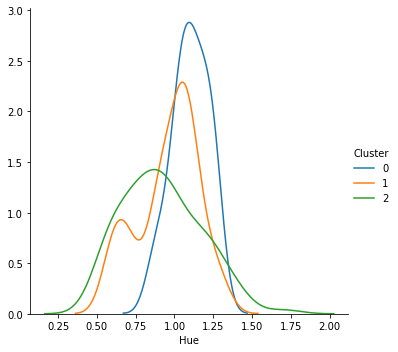

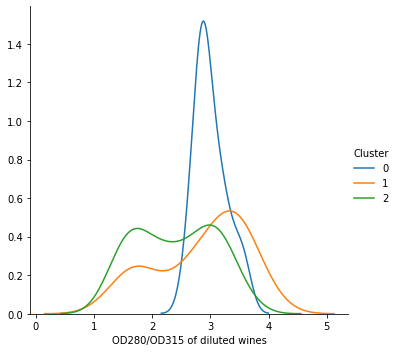

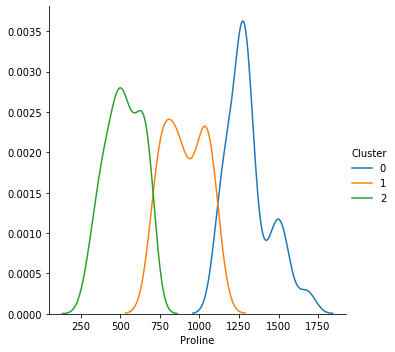

<Figure size 432x504 with 0 Axes>

In [84]:
# We plot every distribution, divinding them by Clusters
for i in col:
    sns.FacetGrid(non_scaled_result,hue="Cluster",height=5).map(sns.distplot,i,hist=False).add_legend()
plt.figure(figsize=(6,7))

We can see that except for Proline and Total phenols most distributions don't show difference for each cluster, actually in most of them cluster 0 and cluster 1 move in the same direction

### Let's double check with the elbow method

In [86]:
# We'll create a dataframe that contains the aggregate distance and number of clusters as two distinct features
elbow = pd.DataFrame(0, index=np.arange(1,11), columns = ['Number of clusters', 'Sum. square distances'])
K = range (1,11)
df_elbow = non_scaled_result.copy()
for i in K:
    elbow['Number of clusters'][i] = i
    test = elbow_method(i, df_elbow)
    elbow['Sum. square distances'][i]= test

In [87]:
elbow

,Number of clusters,Sum. square distances
1,1,46380
2,2,23800
3,3,18436
4,4,13086
5,5,10668
6,6,10110
7,7,8137
8,8,7337
9,9,7152
10,10,5866


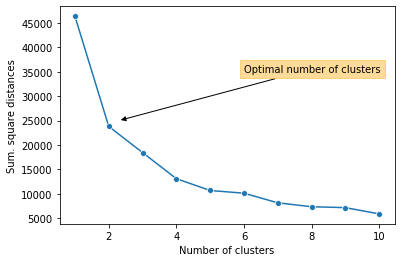

In [94]:
sns.lineplot(x="Number of clusters", y="Sum. square distances", data=elbow, marker="o")

plt.annotate("Optimal number of clusters", xy=(2.3, 25000), xytext=(6, 35000),
             arrowprops={'arrowstyle':'-|>', 'color': 'black' 
                         },
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4});

As we said before, now the optimal number of clusters is 2 and 3 anymore, that is perfectly fine, the down part of it is that we already know that the initial classes of the dataset are 3.